## Two-component mixture model

We consider the following mixture model : 

$$Y := (1-\Delta)\cdot Y_1 +\Delta\cdot Y_2 $$

where $\Delta \sim \mathcal{B}(p), Y_i \sim \mathcal{N}(\mu_i, \sigma_i^2)$ for $i\in \{1, 2\}$ and all the variables are independant.

Let $\phi : \mathbb{R}  \to \mathbb{R}$ a bounded measurable function.

We have : 

$$\begin{aligned} \mathbb{E}(\phi(Y)) &= \mathbb{E}(\phi((1-\Delta)Y_1 + \Delta Y_2)) \\
&= \mathbb{E}(\phi(Y_1) \mathbb{1}(\Delta=0) + \phi(Y_2) \mathbb{1}(\Delta=1) \\
&= (1-p)\mathbb{E}(\phi(Y_1)) + p\mathbb{E}(\phi(Y_2))  \end{aligned}$$

Wich gives us the probability density function of $Y$ with respect to Lebesgue measure : $f_Y(y) = (1-p)f_{Y_1}(y) + pf_{Y_2}(y)$

Remark : 
- The set of probability measures on a measurable set $\left(\Omega, \mathcal{F} \right)$ is a convex set.
 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import bernoulli
import scipy.stats

In [2]:
# PARAMETERS

N_SAMPLES = 20_000
mu1, sigma21 = -4, 2
mu2, sigma22 = 1, 1.
p = .65

In [3]:
y1 = np.random.normal(mu1, sigma21, N_SAMPLES)
y2 = np.random.normal(mu2, sigma22, N_SAMPLES)

In [4]:
b = bernoulli.rvs(p, size=N_SAMPLES)

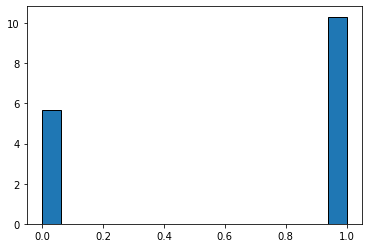

In [5]:
plt.hist(b, density=1, bins='auto', edgecolor='k')
plt.show()

In [6]:
y = (1-b)*y1 + b*y2

In [7]:
t = np.linspace(-10, 4, 200)
pdf1 = scipy.stats.norm(mu1, sigma21).pdf
pdf2 = scipy.stats.norm(mu2, sigma22).pdf

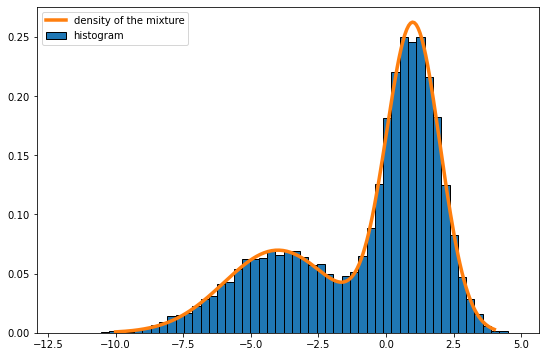

In [8]:
fig = plt.figure(figsize=(9, 6))
plt.hist(y, density=True, bins='auto', edgecolor="k")
plt.plot(t, (1-p)*pdf1(t) + p*pdf2(t), linewidth=3.5)
plt.legend(['density of the mixture', 'histogram'])
plt.show()

## The EM Algorithm for a gaussian mixture model with two components

1. Take initial guesses for the ^arameters $\hat{\mu}_1, \hat{\mu}_2, \hat{\sigma}_1, \hat{\sigma}_1$ and $\hat{p}$
2. Expectation step : compute 

$$  \hat{\gamma}_i = \frac{\hat{p} \hat{f}_2(y_i)}{\hat{p} \hat{f}_2(y_i) + (1-\hat{p})\hat{f}_1(y_i)} \text{ for all } i \in [1, N]$$

3. Maximization step : compute the weighted means and variance 

In [9]:
def EM(y) :
    
    N = len(y)
    iterate = []
    
    # Initialization of estimators 
    
    y1, y2 = np.random.choice(y), np.random.choice(y) # random step
    mu_estim = [y1, y2]
    sigma_estim = [np.std(y), np.std(y)]
    p_estim = 0.5
    gamma = np.zeros(N)
    iterate.append(p_estim)
    for i in range(100) :
        # Expectation step

        pdf1 = scipy.stats.norm(mu_estim[0], sigma_estim[0]).pdf
        pdf2 = scipy.stats.norm(mu_estim[1], sigma_estim[1]).pdf

        gamma = p_estim * pdf2(y) / ((1-p_estim)*pdf1(y) + p_estim * pdf2(y)) # responsibilities computations
    
        # Maximization step

        mu_estim[0], mu_estim[1], sigma_estim[0], sigma_estim[1] = \
        np.sum((1-gamma)*y)/np.sum(1-gamma), \
        np.sum(gamma*y)/np.sum(gamma), \
        np.sqrt(np.sum((1-gamma)*(y-mu_estim[0])**2)/np.sum(1-gamma)), \
        np.sqrt(np.sum(gamma*(y-mu_estim[1])**2)/np.sum(gamma))
        
        p_estim = np.mean(gamma)
        
        iterate.append(p_estim)
            
    return iterate, mu_estim, sigma_estim   

In [10]:
iterate, mu_estim, sigma_estim = EM(y)
print("estimated parameters : \n mu1 = {:.2f} \n mu2 = {:.2f} \n sigma2_1 = {:.2f} \n sigma2_2 = {:.2f} ".format(mu_estim[0], mu_estim[1], sigma_estim[0], sigma_estim[1]))

estimated parameters : 
 mu1 = -4.06 
 mu2 = 0.99 
 sigma2_1 = 1.93 
 sigma2_2 = 1.01 


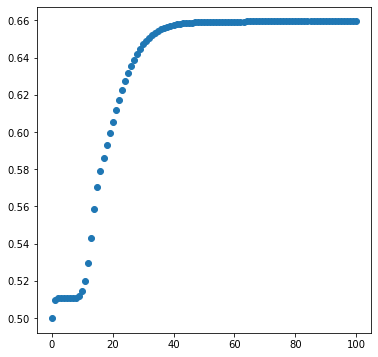

In [11]:
fig = plt.figure(figsize=(6, 6))
plt.plot(iterate, 'o')
plt.show()

In [12]:
t = np.linspace(-10, 4, 200)
pdf1 = scipy.stats.norm(mu_estim[0], sigma_estim[0]).pdf
pdf2 = scipy.stats.norm(mu_estim[1], sigma_estim[1]).pdf

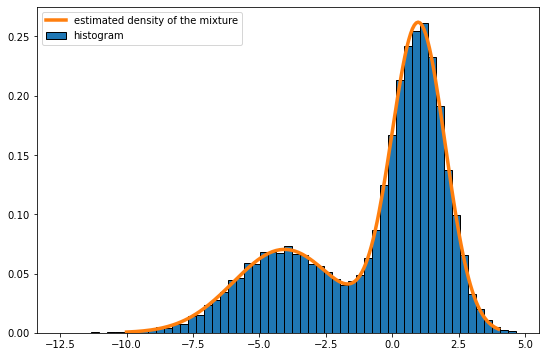

In [13]:
fig = plt.figure(figsize=(9, 6))
plt.hist(y, density=True, bins='auto', edgecolor="k")
plt.plot(t, (1-iterate[-1])*pdf1(t) + iterate[-1]*pdf2(t), linewidth=3.5)
plt.legend(['estimated density of the mixture', 'histogram'])
plt.show()

In [ ]:
# test = [-0.39, 0.06, 0.12, 0.48, 0.94, 1.01, 1.67, 1.68, 1.76, 1.8, 2.44, 3.25, 3.72, 4.12, 4.28, 4.6, 4.92, 5.28, 5.53, 6.22]

In [96]:
## TODO : EM algorithm with K component in the mixture